In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


,Mat,number,ZIII,ZV,MassIII,MassV,Etot,Eg,Mass Total,a,h,d(Mx),ZIII**2,ZV**2,(ZIII+ZV)**2,ZIII**3/2,ZV**3/2,(ZIII+ZV)**3/2,ZIII**5/2,ZV**5/2,(ZIII+ZV)**5/2,ZIII**16/10,ZV**16/10,(ZIII+ZV)**16/10,ZIII**17/10,ZV**17/10,(ZIII+ZV)**17/10,ZIII**18/10,ZV**18/10,(ZIII+ZV)**18/10,ZIII**19/10,ZV**19/10,(ZIII+ZV)**19/10,ZIII**21/10,ZV**21/10,(ZIII+ZV)**21/10,ZIII**22/10,ZV**22/10,(ZIII+ZV)**22/10,ZIII**23/10,ZV**23/10,(ZIII+ZV)**23/10,ZIII**24/10,ZV**24/10,(ZIII+ZV)**24/10
0,BN,0,5,7,10.811000,14.006740,-39.864564,4.2574,24.817740,2.515341,0.000070,1.452233,25,49,144,11.1803,18.5202,41.5692,55.9016,129.6418,498.8306,13.1326,22.4986,53.2954,15.42580,27.3317,68.3294,18.1194,33.20290,87.6044,21.28349,40.3353,112.3167,29.36540,59.5258,184.62070,34.4932,72.3128,236.7002,40.5164,87.8467,303.4707,47.5913,106.7174,389.0764
1,AlN,1,13,7,26.981539,14.006740,-67.851423,2.8788,40.988279,3.131501,0.000102,1.807973,169,49,400,46.8721,18.5202,89.4427,609.3381,129.6418,1788.8540,60.5772,22.4986,120.6835,78.28950,27.3317,162.8360,101.1807,33.20290,219.7121,130.76520,40.3350,296.4530,218.41400,59.5258,539.71300,282.2760,72.3128,728.2250,364.8124,87.8467,982.5824,471.4808,106.7174,1325.7816
2,BP,2,5,15,10.811000,30.973762,-67.001028,0.8999,41.784762,3.214497,0.001667,1.855892,25,225,400,11.1803,58.0947,89.4427,55.9016,871.4212,1788.8540,13.1326,76.1633,120.6830,15.42580,99.8516,162.8362,18.1194,130.90740,219.7121,21.28340,171.6220,296.4530,29.36540,294.9793,539.71300,34.4932,386.7236,728.2250,40.5160,507.0022,982.5824,47.5913,664.6898,1325.7816
3,AlP,3,13,15,26.981539,30.973762,-95.053502,2.3118,57.955301,3.939926,0.000804,2.274717,169,225,784,46.8721,58.0947,148.1620,609.3381,871.4212,4148.5380,60.5772,76.1633,206.7534,78.28950,99.8516,288.5151,101.1807,130.90742,402.6099,130.76525,171.6221,561.8239,218.41420,294.9793,1094.03660,282.2769,386.7236,1526.6787,364.8124,507.0022,2130.4113,471.4808,664.6898,2972.8929
4,GaN,4,31,7,69.732000,14.006740,-306.157701,2.1697,83.738740,3.209252,0.002984,1.852865,961,49,1444,172.6006,18.5202,234.2477,5350.6210,129.6418,8901.4130,243.3205,22.4986,337.0185,343.01630,27.3317,484.8775,483.5607,33.20290,697.6064,681.69040,40.3353,1003.6651,1354.75124,59.5258,2077.52160,1909.8344,72.3128,2988.9862,2692.3523,87.8467,4300.3348,3795.4918,106.7174,6187.0073
5,BAs,5,5,33,10.811000,74.921590,-187.395459,0.7704,85.732590,3.391693,0.005848,1.958204,25,1089,1444,11.1803,189.5705,234.2477,55.9016,6255.8200,8901.4130,13.1326,268.9195,337.0185,15.42580,381.4816,484.8775,18.1194,541.15920,697.6064,21.28340,767.6733,1003.6651,29.36540,1544.8249,2077.52160,34.4932,2191.4454,2988.9862,40.5164,3108.7232,4300.3348,47.5913,4409.9478,6187.0073
6,GaP,6,31,15,69.732000,30.973762,-333.460828,1.7210,100.705762,3.888211,0.403505,2.280836,961,225,2116,172.6006,58.0947,311.9871,5350.6210,871.4212,14351.4100,243.3205,76.1633,457.5225,343.01630,99.8516,670.9471,483.5607,130.90740,983.9297,681.69040,171.6221,1442.9121,1354.75120,294.9793,3103.06900,1909.8344,386.7236,4550.5849,2692.3523,507.0022,6673.3363,3795.4918,664.6898,9786.3061
7,AlAs,7,13,33,26.981539,74.921590,-215.491418,1.6729,101.903129,4.065527,0.446501,2.389324,169,1089,2116,46.8721,189.5707,311.9871,609.3381,6255.8200,14351.4100,60.5772,268.9195,457.5225,78.28950,381.4816,670.9471,101.1807,541.15920,983.9297,130.76520,767.6733,1442.9121,218.41420,1544.8249,3103.06900,282.2769,2191.4454,4550.5849,364.8124,3108.7232,6673.3363,471.4808,4409.9478,9786.3061
8,InN,8,49,7,114.818000,14.006740,-438.903187,0.5732,128.824740,3.586333,0.002854,2.070572,2401,49,3136,343.0000,18.5202,419.0656,16807.0000,129.6418,23467.6700,506.1901,22.4986,626.7593,747.02190,27.3317,937.3885,1102.4348,33.20290,1401.9691,1626.94380,40.3353,2096.8011,3543.33130,59.5258,4690.23770,5229.1533,72.3128,7014.7736,7717.0441,87.8467,10491.3762,11388.6066,106.7174,15691.0232
9,BSb,9,5,51,10.811000,121.760000,-359.000911,0.3279,132.571000,3.736261,0.028927,2.157325,25,2601,3136,11.1803,364.2128,419.0656,55.9016,18574.8500,23467.670

X_train [[0.         0.         0.        ]
 [0.01115404 0.         0.00453728]
 [0.         0.01386678 0.00453728]
 [0.01115404 0.01386678 0.01251567]
 [0.09862058 0.         0.02808442]
 [0.         0.10694426 0.02808442]
 [0.01115404 0.10694426 0.04551896]
 [0.2984224  0.         0.07412064]
 [0.         0.30890038 0.07412064]
 [0.09862058 0.10694426 0.10283411]
 [0.2984224  0.01386678 0.10283411]
 [0.01115404 0.30890038 0.10283411]
 [1.         0.         0.2229954 ]
 [0.         1.         0.2229954 ]
 [1.         0.01386678 0.27521978]
 [0.01115404 1.         0.27521978]
 [0.09862058 1.         0.        ]
 [1.         0.10694426 0.41668153]
 [0.2984224  1.         0.59318791]
 [1.         0.30890038 0.59318791]
 [1.         1.         1.        ]]
X_test [[0.09862058 0.01386678 0.04551896]
 [0.2984224  0.10694426 0.18793701]
 [0.09862058 0.30890038 0.18793701]
 [0.2984224  0.30890038 0.3037429 ]]
y_train [[1.        ]
 [0.67618734]
 [0.21137314]
 [0.54300747]
 [0.50963029]
 [0.1

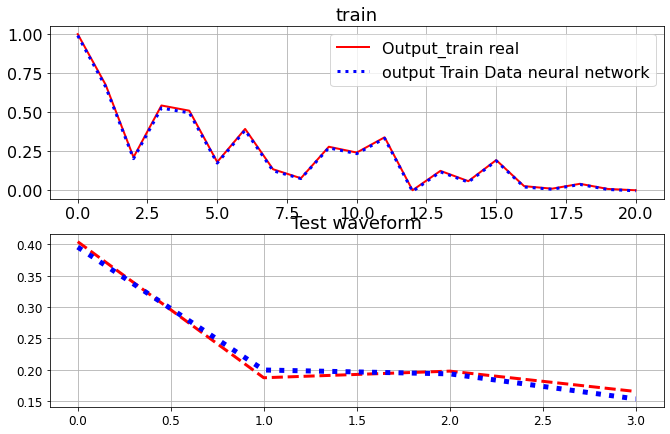

(array([6]), array([13]), array([14]), array([19]))
INPUT DATA TEST RESHAPE [[0.09862058 0.01386678 0.04551896]
 [0.2984224  0.10694426 0.18793701]
 [0.09862058 0.30890038 0.18793701]
 [0.2984224  0.30890038 0.3037429 ]]


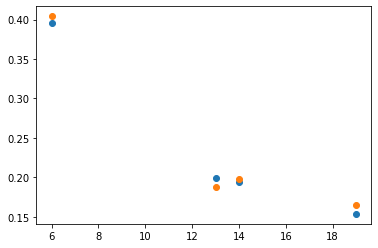

OUTPUT DATA TEST: [[0.40423733]
 [0.18746183]
 [0.19800817]
 [0.16557054]]
y PREDICT FOR TEST DATA: [[0.3955997 ]
 [0.19979364]
 [0.19367218]
 [0.15369281]]
OUTPUT DATA TEST_ no scalar: [[1.721 ]
 [0.7981]
 [0.843 ]
 [0.7049]]
y PREDICT FOR TEST DATA_no scaler: [[1.6842262 ]
 [0.85060143]
 [0.82453996]
 [0.6543318 ]]
error t0: [-0.00863763]
error t1: [0.01233181]
error t2: [-0.00433599]
error t3: [-0.01187772]
R2 PERCENT FOR TEST DATA: [98.95612694]
MSE FOR TRAIN DATA: [6.83458436e-05]
MSE FOR TEST DATA: [9.66408358e-05]
train_time 0.06999373435974121
test_time 0.036232948303222656


In [ ]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import psycopg2 as ps
from __future__ import print_function
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

datasource = "/content/drive/MyDrive/Colab Notebooks/DATA.txt"
dataframe=pd.read_csv(datasource,sep=',')
display(dataframe)

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Data_x=dataframe.loc[:,['ZIII**24/10','ZV**24/10','(ZIII+ZV)**24/10']]

Data_x=Data_x.values
scaler_x = MinMaxScaler()
Data_x = scaler_x.fit_transform(Data_x)
X_train= np.delete(Data_x, (6,13,14,19), axis=0)
num=dataframe.loc[:,['number']]
num=num.values
num=num[6],num[13], num[14],num[19]
#X_train = Data_x.drop([0])
X_test=Data_x[6],Data_x[13],Data_x[14],Data_x[19]
X_test= np.array(X_test)
Data_y=dataframe.loc[:,['Eg']]
#Data_y = scaler.fit_transform(Data_y)
Data_y=Data_y.values
scaler_y =  MinMaxScaler()
Data_y = scaler_y.fit_transform(Data_y)
y_train = np.delete(Data_y, (6,13,14,19), axis=0)
y_test=Data_y[6],Data_y[13],Data_y[14],Data_y[19]
y_test=np.array(y_test)
print("X_train",X_train)
print("X_test",X_test)
print("y_train",y_train)
print("y_test",y_test)



 
X_train.shape
model = keras.models.Sequential([
keras.layers.Dense(35, activation="relu"),
keras.layers.Dense(31, activation="relu"),
keras.layers.Dense(25, activation="relu"),
keras.layers.Dense(15, activation="relu"),
#keras.layers.Dense(10, activation="tanh"),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="RMSProp")
#log_dir='/content/drive/MyDrive/tensorboard'
#tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir='log_dir',histogram_freq=1)
history = model.fit(X_train, y_train, epochs=4000, verbose=0)
#history=history.history
#losses=history['loss']
#accuracies=history['accuracy']
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.plot(losses)
#plt.xlabel('Lpochs')
#plt.ylabel('accuracy')
#plt.plot(accuracies)
#mse_test = model.evaluate(X_test, y_test)
model.save("my_keras_model.h2")

#mse_test = model.evaluate(X_test, y_test)

tstart_train=time.time()
y=model.predict(X_train)
tend_train=time.time()


tstart_test=time.time()

y_pred = model.predict(X_test)

tend_test=time.time()


y_mean = y_test.mean()
ss_res=(sum((y_test-y_pred)**2))
ss_tot=(sum((y_test-y_mean)**2))
R2=1-ss_res/ss_tot
MSE_test=((1/4)*sum((y_pred-y_test)**2))

MSE_TRAIN=((1/21)*sum((y-y_train)**2))
print('INPUT DATA TRAIN',X_train)
print('OUTPUT DATA TRAIN',y_train)
print('INPUT DATA TEST',X_test)
print('OUTPUT DATA TEST',y_test)
print("y PREDICT FOR TRAIN DATA=",y)
print("y PREDICT FOR TEST DATA=",y_pred)



fig = plt.figure(figsize=(11,7))
x = fig.add_subplot(211)
x0 = fig.add_subplot(212)
x.set_title('train',fontsize=18)
x.plot(y_train,color='r',lw=2,label='Output_train real')
x.plot(y,color='b',marker='None',linestyle=':',lw=3,markersize=8,label='output Train Data neural network')


x.tick_params(labelsize=16)
x.legend(fontsize=16,loc='best')
x.grid()
x0.set_title('Test waveform',fontsize=18)
x0.plot(y_test,color='r',marker='None',linestyle='--',lw=3,markersize=3,label=' TEST OUTPUT  DATA REAL')
x0.plot(y_pred,color='b',marker='o',linestyle=':',lw=5,markeredgewidth=0.0, fillstyle='none',markersize=6,label='TEST OUTPUT PREDICT NEURAL NETWORK')



x0.tick_params(labelsize=12)
#x0.legend(fontsize=10,loc='best')
x0.grid()
plt.show()


print(num)
print('INPUT DATA TEST RESHAPE',X_test)
plt.scatter(num, y_pred)
plt.scatter(num, y_test)
plt.show()

print("OUTPUT DATA TEST:",y_test)
print("y PREDICT FOR TEST DATA:",y_pred)
print("OUTPUT DATA TEST_ no scalar:",scaler_y.inverse_transform(y_test))
print("y PREDICT FOR TEST DATA_no scaler:",scaler_y.inverse_transform(y_pred))
print("error t0:",y_pred[0]-y_test[0])
print("error t1:",y_pred[1]-y_test[1])
print("error t2:",y_pred[2]-y_test[2])
print("error t3:",y_pred[3]-y_test[3])
#print("error t4:",y_pred[4]-y_test[4])
#print("error t5:",y_pred[5]-y_test[5])
#print("error t6:",y_pred[6]-y_test[6])
print("R2 PERCENT FOR TEST DATA:",R2*100)
print("MSE FOR TRAIN DATA:",MSE_TRAIN)
print("MSE FOR TEST DATA:",MSE_test)

print("train_time",tend_train-tstart_train)
print("test_time",tend_test-tstart_test)



